![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples//colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_twitter.ipynb)

# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Twitter  Sentiment Classifier  Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


*   List item
*   List item


You can achieve these results or even better on this dataset with training  data  : 

<br> 

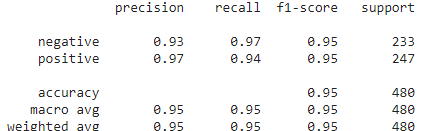

You can achieve these results or even better on this dataset with test  data  : 

<br> 

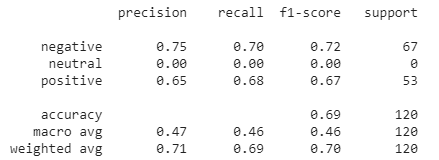

# 1. Install Java 8 and NLU

In [1]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-10-22 21:39:12--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2021-10-22 21:39:12--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1662 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.62K  --.-KB/s    in 0s      

2021-10-22 21:39:12 (26.9 MB/s) - written to stdout [1662/1662]

Installing  NLU 

# 2. Download twitter Sentiment dataset 
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
#Context

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

In [2]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/twitter_data_multi_lang.csv


--2021-10-22 21:40:54--  http://ckl-it.de/wp-content/uploads/2021/02/twitter_data_multi_lang.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125908 (123K) [text/csv]
Saving to: ‘twitter_data_multi_lang.csv’

twitter_data_multi_ 100%[===================>] 122.96K  --.-KB/s    in 0.06s   

2021-10-22 21:40:54 (1.93 MB/s) - ‘twitter_data_multi_lang.csv’ saved [125908/125908]



In [3]:
import pandas as pd
train_path = '/content/twitter_data_multi_lang.csv'

train_df = pd.read_csv(train_path)
train_df.test_sentences = train_df.test_sentences.astype(str)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
train_df= train_df[["text","y"]]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
461,after modi removed your name from voter list a...,negative
283,let state govt handle law and order why drag m...,negative
540,have all these qualities modi and more strong ...,positive
430,agree such idiots the biggest curse for modi a...,negative
533,modi will endup mad manlike hitler mussolini p...,negative
...,...,...
181,funny after dowing two planes endian air chief...,positive
432,the last years the economist led upaii were ec...,negative
502,anchor doing canvas against modi not fit for j...,negative
495,one the most hard working minister modi govt\r...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [4]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       235
    positive       0.97      0.96      0.97       245

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



,trained_sentiment_confidence,document,y,trained_sentiment,sentence_embedding_labse,text
0,0.999988,after modi removed your name from voter list a...,negative,negative,"[-0.03525136, 0.032949567, 0.049605887, 0.0097...",after modi removed your name from voter list a...
1,0.997970,let state govt handle law and order why drag m...,negative,negative,"[-0.0148479575, -0.006520447, 0.037620917, -0....",let state govt handle law and order why drag m...
2,0.999999,have all these qualities modi and more strong ...,positive,positive,"[0.0064747497, 0.031111103, -0.019350154, -0.0...",have all these qualities modi and more strong ...
3,0.993838,agree such idiots the biggest curse for modi a...,negative,negative,"[0.037638582, 0.0022320487, 0.019440027, -0.01...",agree such idiots the biggest curse for modi a...
4,0.999387,modi will endup mad manlike hitler mussolini p...,negative,negative,"[-0.023819957, -0.0053019486, 0.070580944, -0....",modi will endup mad manlike hitler mussolini p...
...,...,...,...,...,...,...
475,0.994881,funny after dowing two planes endian air chief...,positive,positive,"[-0.076085344, 0.07721551, -0.007120685, 0.013...",funny after dowing two planes endian air chief...
476,0.999823,the last years the economist led upaii were ec...,negative,negative,"[-0.054738495, 0.0001529619, -0.013970518, -0....",the last years the economist led upaii were ec...
477,0.999845,anchor doing canvas against modi not fit for j...,negative,negative,"[-0.020987356, 0.04611202, -0.0483219, -0.0614...",anchor doing canvas against modi not fit for j...
478,0.997783,one the most hard working minister modi govt o...,negative,negative,"[0.030751666, 0.023336992, 0.025088795, 0.0112...",one the most hard working minister modi govt\r...


In [6]:
dutch_path = '/content/dutch.csv'
english_path = '/content/english.csv'
dutch_out_path = '/content/dutch_preds.csv'
english_out_path = '/content/english_preds.csv'

print("Parsing Dutch tweets...")
dutch_df = pd.read_csv(dutch_path)
print("Parsing English tweets...")
english_df = pd.read_csv(english_path)

print("Predicting Dutch tweets...")
dutch_preds = fitted_pipe.predict(dutch_df)
print("Predicting English tweets...")
english_preds = fitted_pipe.predict(english_df)

Predicting English tweets...


KeyboardInterrupt: ignored

In [14]:
pd.set_option('display.max_colwidth', None)
dutch_preds[['document', 'y']][-10:-1]


,document,y
1207,Overgang van veld naar zaal voor de jeugd! - Het veldseizoen zit er al bijna op waarbij de B1 en de beide C teams kampioen zijn geworden! Verder toch weer een bijzonder seizoen waarbij we zeker (met de nodige flexibiliteit) wedstrijden hebben ... - https://t.co/drJpnaPPWQ,positive
1208,Jongeren in NL ervaren in toenemende mate ongezonde #stress en prestatiedruk. De regionale kenniswerkplaats jeugd en gezin centraal heeft 6 aanbevelingen om deze druk te verminderen. #NetwerkBeterSamen #thuiszitters #passendonderwijs #leerrecht #Utrecht https://t.co/4yvk9QBUCd,negative
1209,@EelcoHoecke Eens Eelco zo klaar met die jankbeer van het CDA die Afghaanse vakantieman van het @cda die nog langere wachtlijsten voor woningen wil voor onze jeugd.,negative
1210,Schiedam JWTV • VIDEO • Jeugdtrainers Sparta geven clinic aan jeugd Kethel Spaland • #Schiedam https://t.co/T4ewYKTirW,neutral
1211,@artbysophia Diegene die aan de basis stond is later twee keer voor kindermisbruik veroordeeld. Zo onguur is die jeugd-industrie. Las een aanbeveling op LinkedIn vd teamleider over hoe goed ze is in het geld binnenhalen.,negative
1212,@voetveeg_joeri Ik raak van slag als ik me bedenk dat deze band meer aanhang heeft onder de 40+ers dan onder de jeugd ;),negative
1213,@VanderVegt1973 @SteenksRafaela Ik ook. In mn jeugd paar keer per jaar logeren Kieldrecht en Merksem. Bij familie. Super leuke tijd en een heerlijke taal. Bier bij de lunche ipv water. En gevulde chocolade reep erna.,positive
1214,@wierdduk De Hollandse jeugd zijn de nieuwe Engelsen!,negative
1215,@sonnyspek Nee ik heb een gelukkige jeugd gehad. De basisschooltijd was leuker. De middelbare school was minder leuk maar nog altijd leuker dan mijn studententijd. De tijd na mijn studie is ook leuker. Eigenlijk was mijn studententijd dus de slechtste tijd van mijn leven. 😉,positive


# 3.1 evaluate on Test Data

In [5]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


              precision    recall  f1-score   support

    negative       0.84      0.74      0.79        65
     neutral       0.00      0.00      0.00         0
    positive       0.73      0.78      0.75        55

    accuracy                           0.76       120
   macro avg       0.52      0.51      0.51       120
weighted avg       0.79      0.76      0.77       120



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/twitter_data_multi_lang.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


preds

              precision    recall  f1-score   support

    negative       0.83      0.82      0.82        49
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.80      0.83        51

    accuracy                           0.81       100
   macro avg       0.56      0.54      0.55       100
weighted avg       0.84      0.81      0.83       100



,trained_sentiment_confidence,document,origin_index,y,trained_sentiment,text,sentence,sentence_embedding_labse
0,0.999401,how narendra modi has almost killed the indian...,0,negative,negative,how narendra modi has almost killed the indian...,[how narendra modi has almost killed the india...,"[-0.05593567714095116, 0.050420816987752914, -..."
1,0.995770,تعتقد أنه كان مودي وراء هذا الحادث,1,negative,negative,تعتقد أنه كان مودي وراء هذا الحادث,[تعتقد أنه كان مودي وراء هذا الحادث],"[0.007358793169260025, -0.0520767867565155, 0...."
2,0.998129,カマル・ハサーンがチョウキダール・モディを連れて行くカマル・ハサーン・モディの金持ちが貧しい...,2,negative,negative,カマル・ハサーンがチョウキダール・モディを連れて行くカマル・ハサーン・モディの金持ちが貧しい...,[カマル・ハサーンがチョウキダール・モディを連れて行くカマル・ハサーン・モディの金持ちが貧し...,"[-0.012155424803495407, -0.02065391279757023, ..."
3,0.998547,"связанное имя с фамилией, а не bcz религия, св...",3,negative,negative,"связанное имя с фамилией, а не bcz религия, св...","[связанное имя с фамилией, а не bcz религия, с...","[-0.006620907690376043, 0.02574392780661583, -..."
4,1.000000,"kdokoli lepší než modi, když nehruji vypršela,...",4,positive,positive,"kdokoli lepší než modi, když nehruji vypršela,...","[kdokoli lepší než modi, když nehruji vypršela...","[-0.04917769134044647, 0.017523039132356644, -..."
...,...,...,...,...,...,...,...,...
95,0.999987,lol qui va épouser son hippopotame tous les ho...,95,positive,positive,lol qui va épouser son hippopotame tous les ho...,[lol qui va épouser son hippopotame tous les h...,"[-0.01001912634819746, -0.031715311110019684, ..."
96,0.999994,拉贾斯坦邦州长卡莉安·辛格·阿里加3月23日全都是bjp工人，希望bjp胜利，希望莫迪再次成...,96,positive,positive,拉贾斯坦邦州长卡莉安·辛格·阿里加3月23日全都是bjp工人，希望bjp胜利，希望莫迪再次成...,[拉贾斯坦邦州长卡莉安·辛格·阿里加3月23日全都是bjp工人，希望bjp胜利，希望莫迪再次...,"[0.009000560268759727, -0.021888386458158493, ..."
97,0.979382,మోడీ భక్తులు రాహుల్ గురించి అబద్ధాలు చెబుతున్న...,97,positive,positive,మోడీ భక్తులు రాహుల్ గురించి అబద్ధాలు చెబుతున్న...,[మోడీ భక్తులు రాహుల్ గురించి అబద్ధాలు చెబుతున్...,"[-0.05518203601241112, -0.0041709886863827705,..."
98,0.882261,"lol neha, je to jako dát hlavu zabít těm, kteř...",98,positive,positive,"lol neha, je to jako dát hlavu zabít těm, kteř...","[lol neha, je to jako dát hlavu zabít těm, kte...","[-0.019701892510056496, -0.01936856471002102, ..."


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("Congress's new policies made many people sad ")


,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.971534,Congress's new policies made many people sad,0,negative,[Congress's new policies made many people sad],"[0.004380704369395971, -0.00210917298682034, -..."


In [ ]:
fitted_pipe.predict("Congress's new policies made many people happy ")


,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999984,Congress's new policies made many people happy,0,positive,[Congress's new policies made many people happy],"[0.025979558005928993, -0.007445275783538818, ..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Die neue Politik des Kongresses machte viele Menschen arm, traurig und depressiv ")


,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.779711,Die neue Politik des Kongresses machte viele M...,0,negative,[Die neue Politik des Kongresses machte viele ...,"[-0.02746928110718727, 0.015148899517953396, -..."


In [ ]:
# German for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Die neue Politik des Kongresses machte viele Menschen glücklich ")


,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999974,Die neue Politik des Kongresses machte viele M...,0,positive,[Die neue Politik des Kongresses machte viele ...,"[0.008141197264194489, -0.009829358197748661, ..."


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("国会的新政策使许多人感到高兴 ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999998,国会的新政策使许多人感到高兴,0,positive,[国会的新政策使许多人感到高兴],"[0.009464389644563198, -0.012016313150525093, ..."


In [ ]:
# Chinese for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("国会的新政策使许多人变得贫穷，悲伤和沮丧 ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.998916,国会的新政策使许多人变得贫穷，悲伤和沮丧,0,negative,[国会的新政策使许多人变得贫穷，悲伤和沮丧],"[-0.05506608635187149, -0.002640362363308668, ..."


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
#  Afrikaans for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Die Kongres se nuwe beleid het baie mense arm, hartseer en depressief gemaak ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.720446,"Die Kongres se nuwe beleid het baie mense arm,...",0,negative,[Die Kongres se nuwe beleid het baie mense arm...,"[-0.023684442043304443, 0.0034083062782883644,..."


In [ ]:
#  Afrikaans for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Die Kongres se nuwe beleid het baie mense gelukkig gemaak ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999999,Die Kongres se nuwe beleid het baie mense gelu...,0,positive,[Die Kongres se nuwe beleid het baie mense gel...,"[0.005836560856550932, -0.02982638217508793, -..."


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("議会の新しい政策は多くの人々を貧しく、悲しくそして落ち込んだものにしました ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.993153,議会の新しい政策は多くの人々を貧しく、悲しくそして落ち込んだものにしました,0,negative,[議会の新しい政策は多くの人々を貧しく、悲しくそして落ち込んだものにしました],"[-0.04006955772638321, 0.0033476136159151793, ..."


In [ ]:

		
# Japanese for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("議会の新しい政策は多くの人々を幸せにしました ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999996,議会の新しい政策は多くの人々を幸せにしました,0,positive,[議会の新しい政策は多くの人々を幸せにしました],"[-0.017957264557480812, -0.015919487923383713,..."


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Kongrenin yeni politikaları birçok insanı fakir, hüzünlü ve depresif hale getirdi ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.995125,Kongrenin yeni politikaları birçok insanı faki...,0,negative,[Kongrenin yeni politikaları birçok insanı fak...,"[-0.02755207195878029, 0.012688503600656986, -..."


In [ ]:
#  Turkish for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Kongrenin yeni politikaları birçok insanı mutlu etti ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999997,Kongrenin yeni politikaları birçok insanı mutl...,0,positive,[Kongrenin yeni politikaları birçok insanı mut...,"[0.019367843866348267, -0.0063224597834050655,..."


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("המדיניות החדשה של הקונגרס גרמה לאנשים רבים להיות עניים, עצובים ומדוכאים ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.994727,המדיניות החדשה של הקונגרס גרמה לאנשים רבים להי...,0,negative,[המדיניות החדשה של הקונגרס גרמה לאנשים רבים לה...,"[-0.03273192420601845, -0.016592275351285934, ..."


In [ ]:
# Hebrew for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("המדיניות החדשה של הקונגרס שימחה אנשים רבים ")
		

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999977,המדיניות החדשה של הקונגרס שימחה אנשים רבים,0,positive,[המדיניות החדשה של הקונגרס שימחה אנשים רבים],"[0.0014839837094768882, -0.01997891254723072, ..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("కాంగ్రెస్ కొత్త విధానాలు చాలా మందిని పేదలుగా, విచారంగా, నిరాశకు గురి చేశాయి ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.994245,"కాంగ్రెస్ కొత్త విధానాలు చాలా మందిని పేదలుగా, ...",0,negative,"[కాంగ్రెస్ కొత్త విధానాలు చాలా మందిని పేదలుగా,...","[-0.02907465025782585, -0.02225475199520588, -..."


In [ ]:
# Telugu for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("కాంగ్రెస్ కొత్త విధానాలు చాలా మందికి సంతోషాన్నిచ్చాయి ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,1.0,కాంగ్రెస్ కొత్త విధానాలు చాలా మందికి సంతోషాన్న...,0,positive,[కాంగ్రెస్ కొత్త విధానాలు చాలా మందికి సంతోషాన్...,"[0.003831395646557212, -0.034895412623882294, ..."


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Новая политика Конгресса сделала многих людей бедными, грустными и подавленными ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.997476,Новая политика Конгресса сделала многих людей ...,0,negative,[Новая политика Конгресса сделала многих людей...,"[-0.029941784217953682, 0.016272399574518204, ..."


In [ ]:

		
#  Russian for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Новая политика Конгресса порадовала многих людей ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999979,Новая политика Конгресса порадовала многих людей,0,positive,[Новая политика Конгресса порадовала многих лю...,"[-0.002074694959446788, 0.014204198494553566, ..."


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:

		
# Urdu for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو غریب ، افسردہ اور افسردہ کردیا ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999625,کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو غ...,0,negative,[کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو ...,"[-0.032778408378362656, -0.01915016397833824, ..."


In [ ]:
# Urdu for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو خوش کیا ")
		

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.995908,کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو خ...,0,positive,[کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو ...,"[0.0033543300814926624, -0.0338786281645298, -..."


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("कांग्रेस की नई नीतियों ने कई लोगों को गरीब, दुखी और उदास बना दिया ")
		

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.995045,"कांग्रेस की नई नीतियों ने कई लोगों को गरीब, दु...",0,negative,"[कांग्रेस की नई नीतियों ने कई लोगों को गरीब, द...","[-0.030935177579522133, -0.011918646283447742,..."


In [ ]:
# hindi for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("कांग्रेस की नई नीतियों ने कई लोगों को खुश किया ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999983,कांग्रेस की नई नीतियों ने कई लोगों को खुश किया,0,positive,[कांग्रेस की नई नीतियों ने कई लोगों को खुश किया],"[0.005392681807279587, -0.024082284420728683, ..."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
		
# French for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Les nouvelles politiques du Congrès ont rendu de nombreuses personnes pauvres, tristes et déprimées ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.995686,Les nouvelles politiques du Congrès ont rendu ...,0,negative,[Les nouvelles politiques du Congrès ont rendu...,"[-0.017834002152085304, 0.011118772439658642, ..."


In [ ]:
# French for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Les nouvelles politiques du Congrès ont rendu de nombreuses personnes heureuses ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999999,Les nouvelles politiques du Congrès ont rendu ...,0,positive,[Les nouvelles politiques du Congrès ont rendu...,"[0.019515689462423325, -0.010051749646663666, ..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("นโยบายใหม่ของสภาคองเกรสทำให้หลายคนยากจนเศร้าและหดหู่ ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.727099,นโยบายใหม่ของสภาคองเกรสทำให้หลายคนยากจนเศร้าแล...,0,positive,[นโยบายใหม่ของสภาคองเกรสทำให้หลายคนยากจนเศร้าแ...,"[4.369320549812983e-07, -0.002880594925954938,..."


In [ ]:
# Thai for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("นโยบายใหม่ของสภาคองเกรสทำให้หลายคนพอใจ ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999999,นโยบายใหม่ของสภาคองเกรสทำให้หลายคนพอใจ,0,positive,[นโยบายใหม่ของสภาคองเกรสทำให้หลายคนพอใจ],"[0.012098133563995361, 0.006513903383165598, -..."


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យប្រជាជនជាច្រើនក្រីក្រក្រៀមក្រំនិងធ្លាក់ទឹកចិត្ត ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.987534,គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យប្រជាជនជាច្រើនក្...,0,negative,[គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យប្រជាជនជាច្រើនក...,"[-0.045212410390377045, 0.010355290956795216, ..."


In [ ]:
# Khmer for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យមនុស្សជាច្រើនសប្បាយរីករាយ ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999997,គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យមនុស្សជាច្រើនសប្...,0,positive,[គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យមនុស្សជាច្រើនសប...,"[-0.025576695799827576, -0.020313698798418045,..."


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
		
# Yiddish for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן נעבעך, טרויעריק און דערשלאָגן ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.972501,קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן ...,0,positive,[קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן...,"[-0.007056341972202063, -0.0033368950244039297..."


In [ ]:
# Yiddish for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן צופרידן ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999997,קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן ...,0,positive,[קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן...,"[0.002619848819449544, -0.018449869006872177, ..."


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Конгресстин жаңы саясаты көптөгөн адамдарды жакыр, кайгыга чөгүп, көңүл чөгөттү ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.987505,Конгресстин жаңы саясаты көптөгөн адамдарды жа...,0,negative,[Конгресстин жаңы саясаты көптөгөн адамдарды ж...,"[-0.0002846009156201035, -0.002948872279375791..."


In [ ]:
# Kygrgyz for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Конгресстин жаңы саясаты көпчүлүктү кубандырды ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999999,Конгресстин жаңы саясаты көпчүлүктү кубандырды,0,positive,[Конгресстин жаңы саясаты көпчүлүктү кубандырды],"[0.018544858321547508, -0.003260228084400296, ..."


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("காங்கிரசின் புதிய கொள்கைகள் பலரை ஏழைகளாகவும், சோகமாகவும், மனச்சோர்வடையச் செய்தன ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.974183,"காங்கிரசின் புதிய கொள்கைகள் பலரை ஏழைகளாகவும், ...",0,negative,"[காங்கிரசின் புதிய கொள்கைகள் பலரை ஏழைகளாகவும்,...","[-0.006572885904461145, -0.0003982966300100088..."


In [ ]:
# Tamil for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("காங்கிரசின் புதிய கொள்கைகள் பலரை மகிழ்ச்சியடையச் செய்தன ")

,trained_sentiment_confidence,document,origin_index,trained_sentiment,sentence,sentence_embedding_labse
0,0.999997,காங்கிரசின் புதிய கொள்கைகள் பலரை மகிழ்ச்சியடைய...,0,positive,[காங்கிரசின் புதிய கொள்கைகள் பலரை மகிழ்ச்சியடை...,"[0.018834874033927917, -0.01959705911576748, -..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('I am extremly depressed and down cause of school and just feel like ending my life...')
preds

,origin_index,sentiment_confidence,sentence,sentence_embedding_from_disk,document,sentiment,text
0,8589934592,"[0.9989802, 0.9989802]",[I am extremly depressed and down cause of sch...,"[[-0.029913833364844322, -0.03314201161265373,...",I am extremly depressed and down cause of scho...,"[negative, negative]",I am extremly depressed and down cause of scho...


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')              | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_detect